In [1]:
import os
import tempfile

import matplotlib.pyplot as plt
import numpy as np

import pyabc

C:\Users\shansul\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\shansul\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def model(parameter):
    return {"data": parameter["mu"] + 0.5 * np.random.randn()}

In [3]:
prior = pyabc.Distribution(mu=pyabc.RV("uniform", 0, 5))

In [4]:
def distance(x, x0):
    return abs(x["data"] - x0["data"])

In [5]:
abc = pyabc.ABCSMC(model, prior, distance, population_size=1000)

In [6]:
db_path = os.path.join(tempfile.gettempdir(), "test.db")
observation = 2.5
abc.new("sqlite:///" + db_path, {"data": observation})

ABC.History INFO: Start <ABCSMC id=1, start_time=2024-09-02 23:57:44>


In [7]:
history = abc.run(minimum_epsilon=0.1, max_nr_populations=10)

ABC INFO: Calibration sample t = -1.
ABC INFO: t: 0, eps: 1.28790377e+00.
ABC INFO: Accepted: 1000 / 1935 = 5.1680e-01, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 6.38626873e-01.
ABC INFO: Accepted: 1000 / 2393 = 4.1789e-01, ESS: 9.5063e+02.
ABC INFO: t: 2, eps: 3.16274038e-01.
ABC INFO: Accepted: 1000 / 3158 = 3.1666e-01, ESS: 4.2441e+02.
ABC INFO: t: 3, eps: 1.46936018e-01.
ABC INFO: Accepted: 1000 / 6657 = 1.5022e-01, ESS: 7.4385e+02.
ABC INFO: t: 4, eps: 7.64222571e-02.
ABC INFO: Accepted: 1000 / 11729 = 8.5259e-02, ESS: 7.8819e+02.
ABC INFO: Stop: Minimum epsilon.
ABC.History INFO: Done <ABCSMC id=1, duration=0:00:26.510808, end_time=2024-09-02 23:58:10>


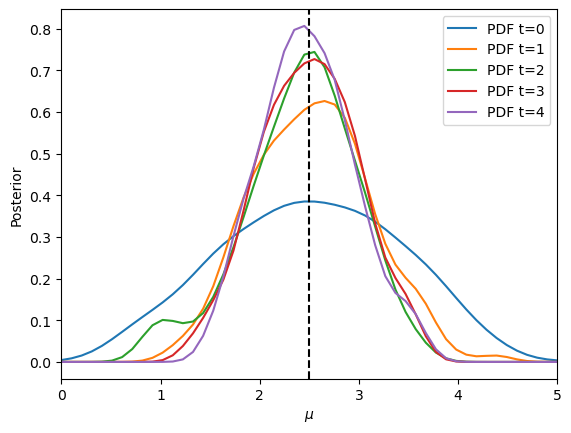

In [8]:
fig, ax = plt.subplots()
for t in range(history.max_t + 1):
    df, w = history.get_distribution(m=0, t=t)
    pyabc.visualization.plot_kde_1d(
        df,
        w,
        xmin=0,
        xmax=5,
        x="mu",
        xname=r"$\mu$",
        ax=ax,
        label=f"PDF t={t}",
    )
ax.axvline(observation, color="k", linestyle="dashed")
ax.legend();

In [13]:
dir(history)

['DB_TIMEOUT',
 'PRE_TIME',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_version',
 '_close_session',
 '_engine',
 '_find_latest_id',
 '_id',
 '_make_session',
 '_save_to_population_db',
 '_session',
 '_set_version',
 'alive_models',
 'all_runs',
 'append_population',
 'db',
 'db_file',
 'db_size',
 'done',
 'get_abc',
 'get_all_populations',
 'get_distribution',
 'get_ground_truth_parameter',
 'get_model_probabilities',
 'get_nr_particles_per_population',
 'get_population',
 'get_population_extended',
 'get_population_strategy',
 'get_weighted_distances',
 'get_weighted_sum_stats',
 'get_weighted_sum_stats_for_model',
 'id',
 'in_memory',
 

In [34]:
history.get_population().get_particles_by_model()[0][1].parameter['mu']

2.463017827751232